In [1]:
#imports cell
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_mall = pd.read_csv('Mall_Customers.csv')

In [4]:
data_mall.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
104,105,Male,49,62,56
169,170,Male,32,87,63
129,130,Male,38,71,75
184,185,Female,41,99,39
186,187,Female,54,101,24
45,46,Female,24,39,65
130,131,Male,47,71,9
26,27,Female,45,28,32
36,37,Female,42,34,17
92,93,Male,48,60,49


In [5]:
data_mall.shape

(200, 5)

In [6]:
# change Col Name
replaced_colname = ['cust_id', 'gender', 'age', 'income', 'spending']
colname = data_mall.columns.tolist()
dict_colname = dict(zip(colname, replaced_colname))

data_mall = data_mall.rename(columns=dict_colname)

In [7]:
data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Simple exploration

In [8]:
# Gender 
data_mall.gender.value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
# Age
data_mall.age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

In [10]:
data_mall.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [11]:
data_mall.spending.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending, dtype: float64

<Axes: ylabel='Frequency'>

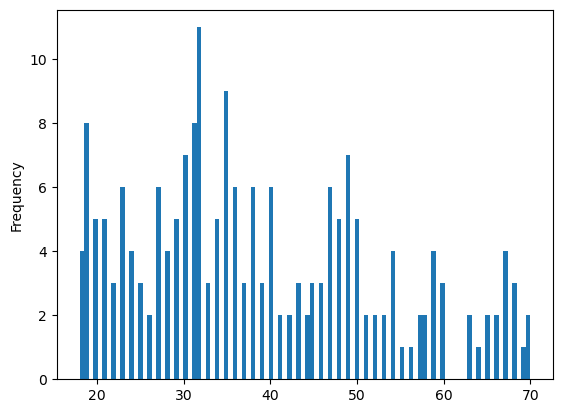

In [12]:
# Histogram
data_mall.age.plot(kind='hist', bins=100)

In [13]:

data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1st Trials

In [14]:
X = data_mall[['age', 'income', 'spending']]

In [19]:
Km = KMeans(n_clusters=7)

In [20]:
Km.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [21]:
data_mall['clus1'] = Km.predict(X)


In [22]:
data_mall.sample(15)

,cust_id,gender,age,income,spending,clus1
107,108,Male,54,63,46,6
35,36,Female,21,33,81,1
194,195,Female,47,120,16,5
44,45,Female,49,39,28,4
111,112,Female,19,63,54,2
126,127,Male,43,71,35,0
170,171,Male,40,87,13,0
145,146,Male,28,77,97,3
33,34,Male,18,33,92,1
60,61,Male,70,46,56,6


<Axes: xlabel='spending', ylabel='income'>

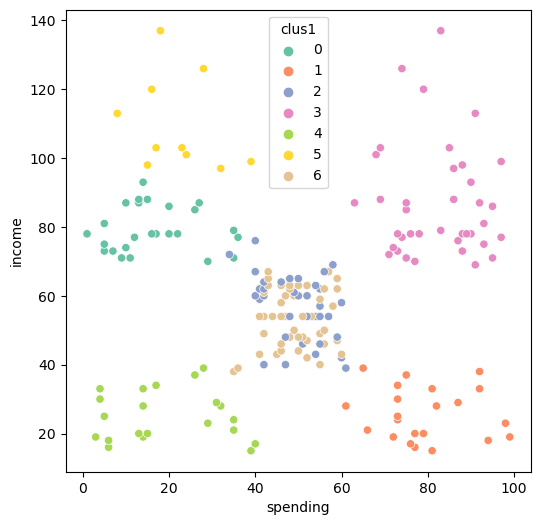

In [25]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data_mall, palette='Set2', x='spending', y='income', hue='clus1')

### PCA (principal component analysis)

In [26]:
pca_model = PCA(n_components=2)
pca_model.fit(X)

PCA(n_components=2)

In [27]:
data_mall[['pca_1', 'pca_2']] = pd.DataFrame(pca_model.transform(X))

In [28]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2
141,142,Male,32,75,93,3,43.435100,-13.787667
55,56,Male,47,43,41,6,-19.107844,-7.847706
75,76,Male,26,54,54,2,1.553620,-9.166719
184,185,Female,41,99,39,5,13.417905,37.783370
33,34,Male,18,33,92,1,20.571819,-48.999047


<Axes: xlabel='pca_1', ylabel='pca_2'>

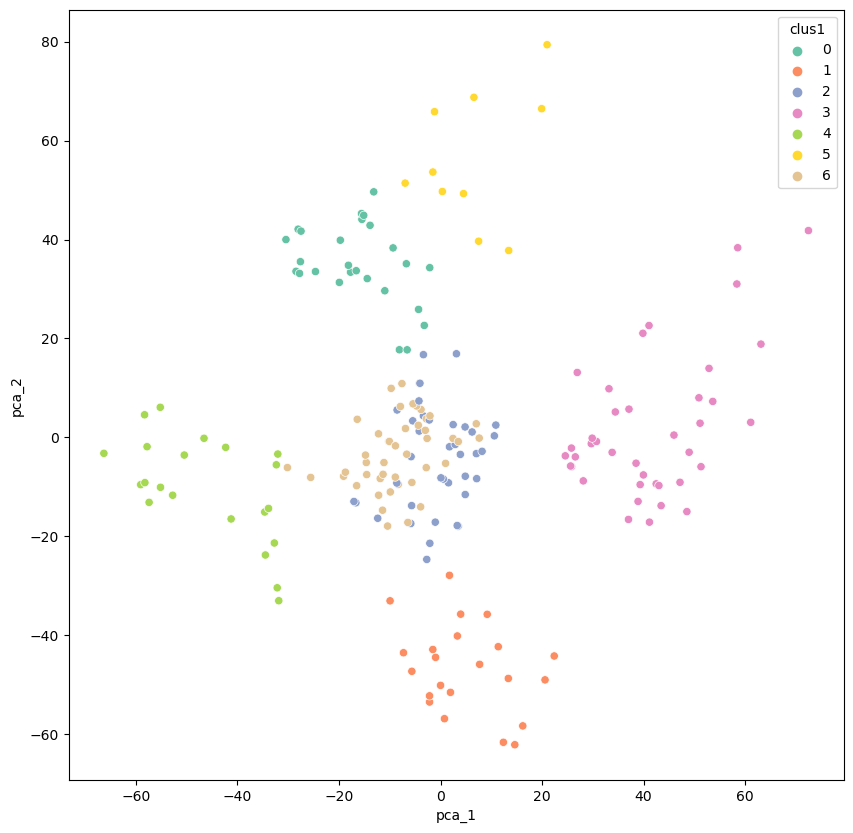

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus1')

In [30]:
K_list=list(np.arange(2,20))
K_list

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [31]:
data_eval = []
for k in K_list:
    km = KMeans(n_clusters=k)
    km.fit(X)
    class_result = km.predict(X)
    ss = silhouette_score(X, class_result)
    data_eval.append([k, ss])
data_eval

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[[2, 0.293166070535953],
 [3, 0.3839349967742105],
 [4, 0.40546302077733304],
 [5, 0.44428597560893024],
 [6, 0.4523443947724053],
 [7, 0.4412807576186172],
 [8, 0.42815090426876606],
 [9, 0.40691886184822307],
 [10, 0.3860667185028747],
 [11, 0.3707484435003203],
 [12, 0.35744719043448187],
 [13, 0.3693782985652698],
 [14, 0.3297727484455564],
 [15, 0.3485162170688284],
 [16, 0.3301921270904307],
 [17, 0.34454214972703645],
 [18, 0.33993443538910156],
 [19, 0.33453953295083116]]

In [32]:
df_data_eval = pd.DataFrame(data_eval,columns=['k','silhouette'])
df_data_eval.index = df_data_eval['k']

<Axes: xlabel='k'>

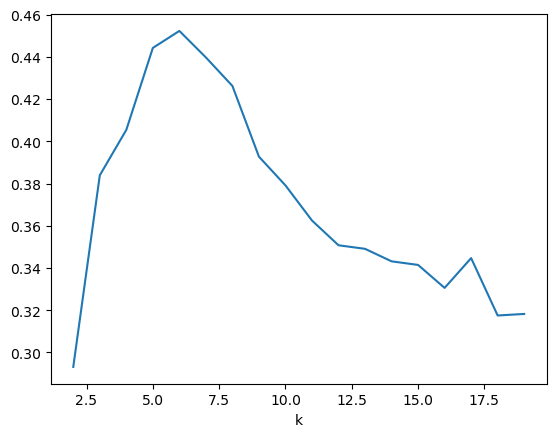

In [77]:
df_data_eval.silhouette.plot()

In [37]:
# Retrain using K = 5
km_1 = KMeans(n_clusters=5)
km_1.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [38]:
data_mall['clus_2'] = km_1.predict(X)

In [39]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2,clus_2
166,167,Male,42,86,20,0,-9.357336,38.309809,1
188,189,Female,41,103,17,5,-1.519454,53.642972,1
93,94,Female,40,60,40,2,-8.564124,5.551838,4
16,17,Female,35,21,35,4,-34.506235,-23.760073,3
124,125,Female,23,70,29,0,-8.111114,17.722236,1


<Axes: xlabel='pca_1', ylabel='pca_2'>

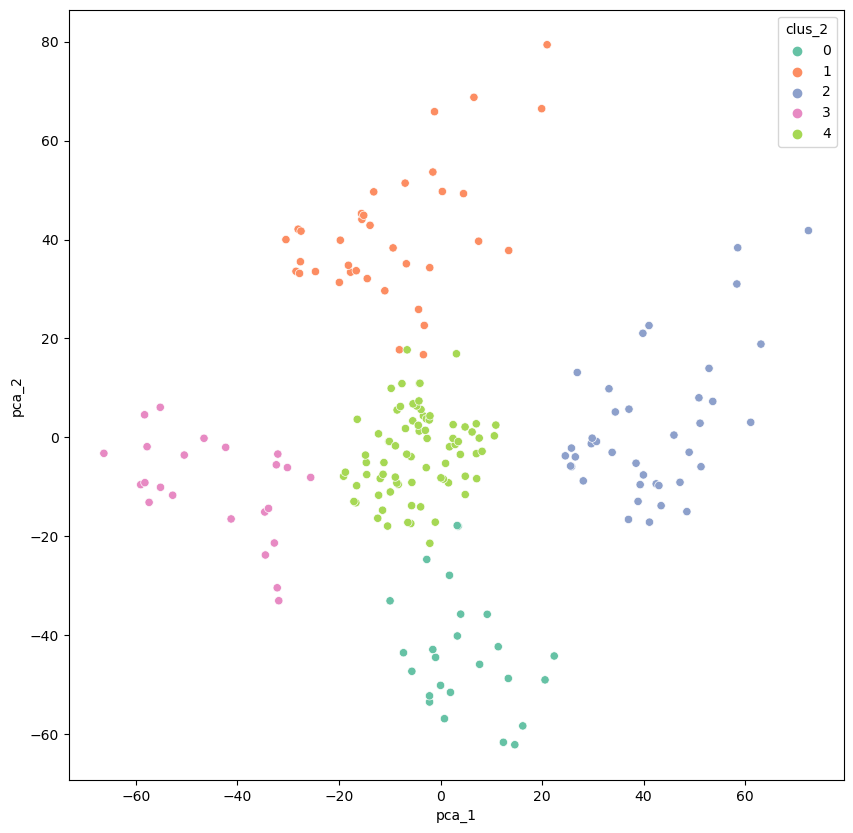

In [40]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus_2')

In [133]:
# 5 Clusters
# plt.figure(figsize=(10, 10))
# sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus_2')

In [42]:
data_intp = data_mall.groupby('clus_2')[['age', 'income','spending']].mean()
data_intp

,age,income,spending
clus_2,,,
0,24.960000,28.040000,77.000000
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,43.727273,55.480519,49.324675


<Figure size 1000x1000 with 0 Axes>

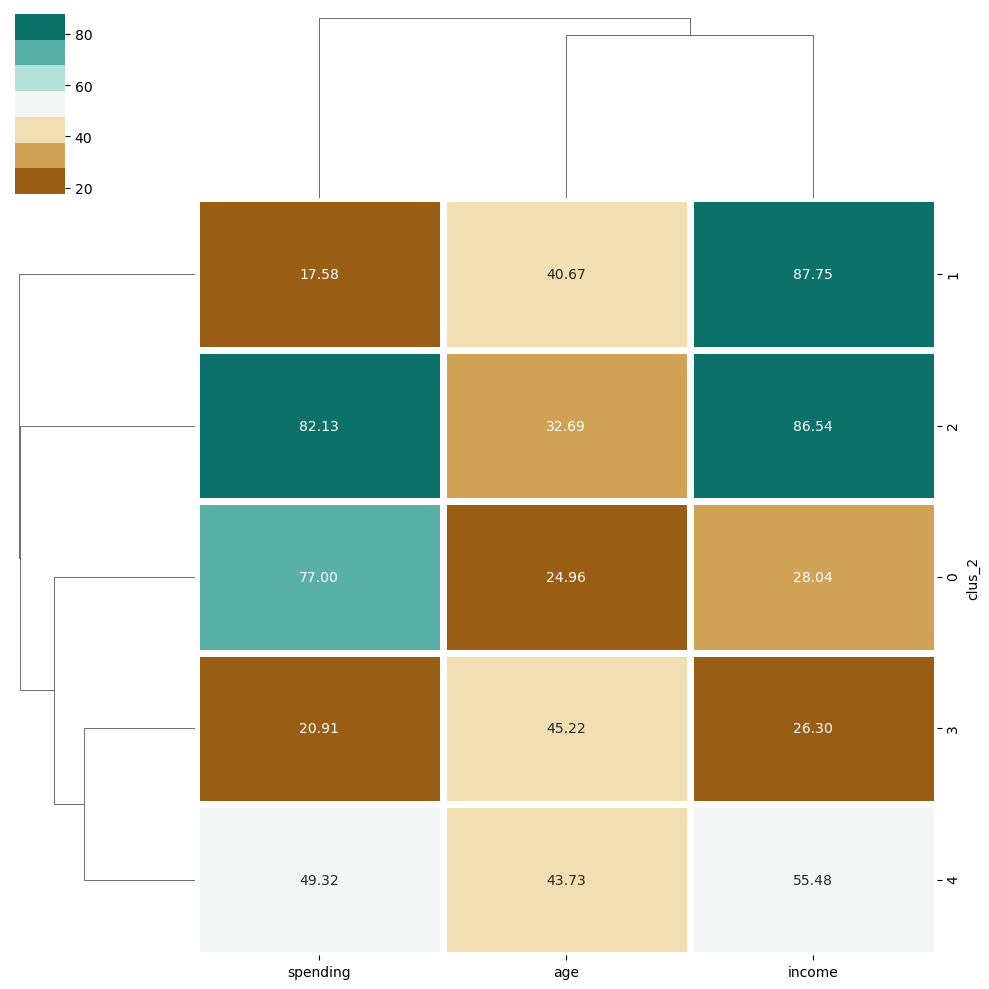

In [43]:
plt.figure(figsize=(10,10))
sns.clustermap(data_intp, annot=True, linewidths=5, fmt='.2f', cmap=sns.color_palette('BrBG',7))

In [44]:
# Standard scalling
scale_mod = StandardScaler()

In [45]:
scale_mod.fit(X)


StandardScaler()

In [46]:
data_mall[['age_s', 'income_s', 'spending_s']] = pd.DataFrame(scale_mod.transform(X))

In [47]:
data_mall.sample(10)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2,clus_2,age_s,income_s,spending_s
113,114,Male,19,64,46,2,2.474878,2.591590,4,-1.424569,0.131303,-0.163051
129,130,Male,38,71,75,3,25.798754,-5.904935,2,-0.061002,0.398489,0.962775
153,154,Female,38,78,76,3,30.705237,-0.820218,2,-0.061002,0.665675,1.001596
172,173,Male,36,87,10,0,-15.494814,44.071529,1,-0.204535,1.009200,-1.560627
47,48,Female,27,40,47,2,-12.378304,-16.335619,4,-0.850435,-0.784763,-0.124229
75,76,Male,26,54,54,2,1.553620,-9.166719,4,-0.922202,-0.250391,0.147522
95,96,Male,24,60,52,2,3.891422,-3.430568,4,-1.065735,-0.021375,0.069879
163,164,Female,31,81,93,3,47.155920,-9.068378,2,-0.563369,0.780183,1.661563
158,159,Male,34,78,1,0,-27.488604,41.699440,1,-0.348068,0.665675,-1.910021
157,158,Female,30,78,78,3,33.789024,-3.015767,2,-0.635135,0.665675,1.079239


In [48]:
data_mall[['age_s', 'income_s', 'spending_s']].std()

age_s         1.002509
income_s      1.002509
spending_s    1.002509
dtype: float64

In [49]:
data_intp2 = data_mall.groupby('clus_2')[['age_s', 'income_s','spending_s']].mean()
data_intp2

,age_s,income_s,spending_s
clus_2,,,
0,-0.996839,-1.241270,1.040418
1,0.130376,1.037827,-1.266230
2,-0.441917,0.991583,1.239503
3,0.456967,-1.307519,-1.136965
4,0.350026,-0.193881,-0.033981


<Figure size 1000x1000 with 0 Axes>

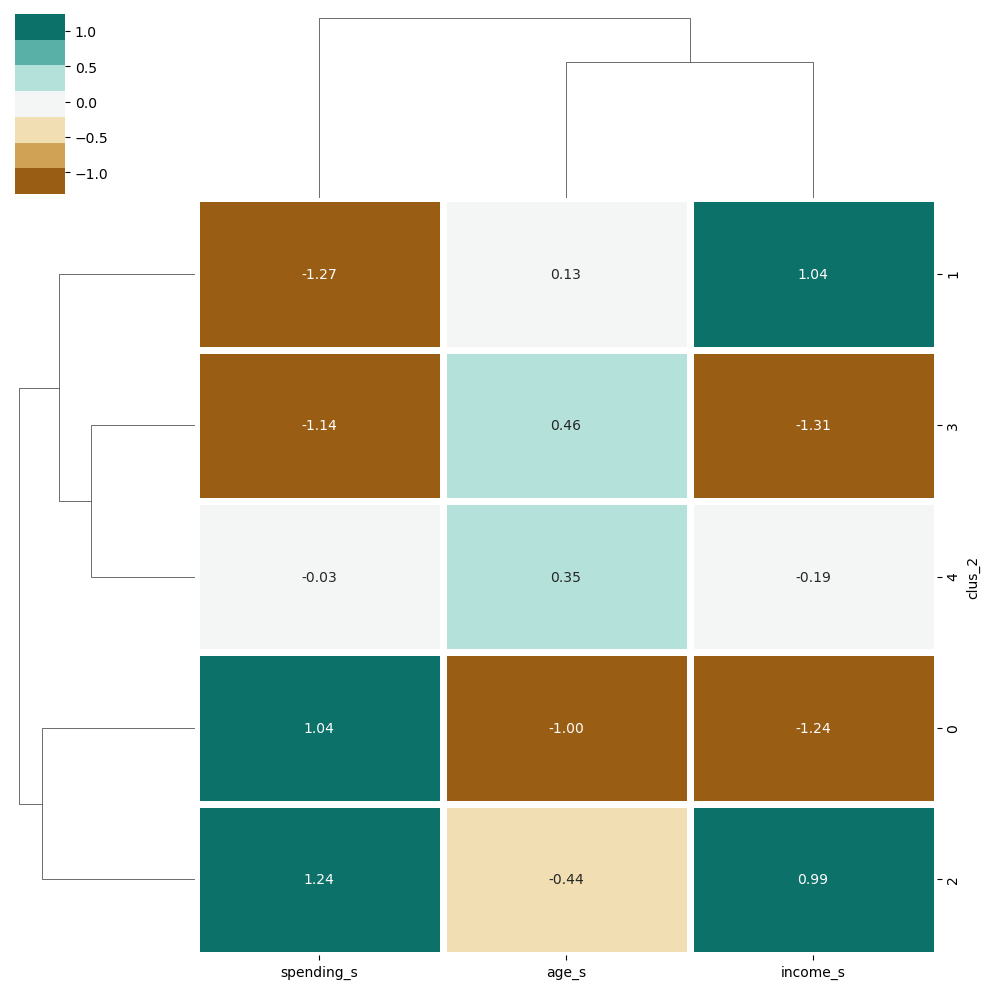

In [50]:
plt.figure(figsize=(10,10))
sns.clustermap(data_intp2, annot=True, linewidths=5, fmt='.2f', cmap=sns.color_palette('BrBG',7))